# Experimentation with the SIS-SIS phase transition 

### Importing packages

In [31]:
import dynalearn as dl
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

epsilon = 5e-3
def absorbing_state(mf):
    x = np.ones(mf.array_shape).astype(mf.dtype) * epsilon
    x[0] = 1 - epsilon
    x = mf.normalize_state(x)
    return x.reshape(-1)


def epidemic_state(mf):
    x = np.ones(mf.array_shape).astype(mf.dtype) * epsilon
    x[0] = 1 - epsilon
    x = 1 - x
    x = mf.normalize_state(x)
    return x.reshape(-1)


def generic_state(mf, s):
    x = np.ones(mf.array_shape).astype(mf.dtype) * epsilon
    x[s] = 1
    x = mf.normalize_state(x)
    return x.reshape(-1)

In [53]:
N = 1000
avgk = np.linspace(0.1, 5, 40)
# tau = (0.04, 0.03)
# gamma = (0.08, 0.1)
# zeta = 5
inf = 0.03, 0.04
rec = 0.1, 0.08
recc = 0.08
c = 5
temperature = 6
params = {
            "infection1": 0.04,
            "infection2": 0.03,
            "recovery1": 0.1,
            "recovery2": 0.11,
            "coupling": 5,
        }

In [36]:
degree_dist = dl.utilities.poisson_distribution(5, num_k=num_k)

mf = dl.metrics.meanfields.SISSIS_MF(degree_dist, params)
config = dl.metrics.MetricsConfig.SISSISMetrics()
config.mf_parameters = np.linspace(0.1, 5, 25)
config.num_k = 6
config.epsilon = epsilon
metrics = dl.metrics.PoissonEpidemicsMFMetrics(config)
# threshold1 = discontinuous_threshold(mf, 0.1, 5, epidemic_state(mf), tol=1e-3, verbose=1)
# threshold2 = discontinuous_threshold(mf, 0.1, 5, absorbing_state(mf), tol=1e-3, verbose=1)

In [54]:
avgk = np.linspace(0.1, 5, 25)

low_s = np.zeros(avgk.shape)
high_s = np.zeros(avgk.shape)
stability = np.zeros(avgk.shape)
num_k = config.num_k

p_k = dl.utilities.poisson_distribution(avgk[0], num_k=num_k)
mf = dl.metrics.meanfields.SISSIS_MF(p_k, params)
# mf = dl.metrics.meanfields.PlanckSIS_MF(p_k, params)
x0 = absorbing_state(mf)
for i, k in enumerate(avgk):
    print("low: k = {0}".format(k), mf.to_avg(x0)[0])
    p_k = dl.utilities.poisson_distribution(k, num_k=num_k)
    mf.degree_dist = p_k
    x0 = mf.search_fixed_point(x0=x0)
    low_s[i] = mf.to_avg(x0)[0]

avgk_rev = avgk[::-1]
p_k = dl.utilities.poisson_distribution(avgk_rev[-1], num_k=num_k)
mf = dl.metrics.meanfields.SISSIS_MF(p_k, params)
# mf = dl.metrics.meanfields.PlanckSIS_MF(p_k, params)
x0 = epidemic_state(mf)
for i, k in enumerate(avgk_rev):
    print("high: k = {0}".format(k))
    p_k = dl.utilities.poisson_distribution(k, num_k=num_k)
    mf.degree_dist = p_k
    x0 = mf.search_fixed_point(x0=x0)
    high_s[i] = mf.to_avg(x0)[0]



low: k = 0.1 0.9851485148514855
low: k = 0.3041666666666667 0.9999340045692768
low: k = 0.5083333333333334 0.9998440781044711
low: k = 0.7125 0.9997616075244244
low: k = 0.9166666666666667 0.9996840243906748
low: k = 1.1208333333333336 0.9996090900997449
low: k = 1.3250000000000002 0.9995347858172641
low: k = 1.529166666666667 0.9994592194207776
low: k = 1.7333333333333336 0.9993805432670524
low: k = 1.9375000000000002 0.9992968776420705
low: k = 2.141666666666667 0.9992062353703015
low: k = 2.3458333333333337 0.9991064433287427
low: k = 2.5500000000000003 0.9989950565705122
low: k = 2.754166666666667 0.9988692604236502
low: k = 2.958333333333334 0.9987257552790041
low: k = 3.1625000000000005 0.9985606177772652
low: k = 3.366666666666667 0.13432911088924193
low: k = 3.5708333333333337 0.11895738213147417
low: k = 3.7750000000000004 0.10570521380988845
low: k = 3.9791666666666674 0.0944289753471887
low: k = 4.183333333333334 0.08466275988985135
low: k = 4.3875 0.07623645492397031
low: k

In [55]:
fp = metrics.compute_fixed_points(mf)



Fixed points:   0%|          | 0/50 [00:00<?, ?it/s]

Fixed points:   2%|▏         | 1/50 [00:03<02:58,  3.63s/it]

Fixed points:   4%|▍         | 2/50 [00:03<02:04,  2.60s/it]

Fixed points:   6%|▌         | 3/50 [00:04<01:28,  1.88s/it]

Fixed points:   8%|▊         | 4/50 [00:04<01:03,  1.37s/it]

Fixed points:  10%|█         | 5/50 [00:04<00:45,  1.02s/it]

Fixed points:  12%|█▏        | 6/50 [00:04<00:34,  1.29it/s]

Fixed points:  14%|█▍        | 7/50 [00:04<00:25,  1.67it/s]

Fixed points:  16%|█▌        | 8/50 [00:04<00:20,  2.09it/s]

Fixed points:  18%|█▊        | 9/50 [00:05<00:16,  2.54it/s]

Fixed points:  20%|██        | 10/50 [00:05<00:13,  2.99it/s]

Fixed points:  22%|██▏       | 11/50 [00:05<00:11,  3.43it/s]

Fixed points:  24%|██▍       | 12/50 [00:05<00:09,  3.81it/s]

Fixed points:  26%|██▌       | 13/50 [00:05<00:08,  4.13it/s]

Fixed points:  28%|██▊       | 14/50 [00:06<00:08,  4.37it/s]

Fixed points:  30%|███       | 15/50 [00:06<00:07,  4.55it/s]

Fixed po

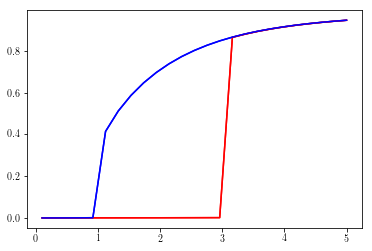

In [56]:
# plt.plot(avgk_rev[avgk_rev < threshold1], 1 - high_s[avgk_rev <threshold1], 'b-')
# plt.plot(avgk_rev[avgk_rev > threshold1], 1 - high_s[avgk_rev >threshold1], 'b-')
# plt.axvline(threshold1, linestyle='--', )

# plt.plot(avgk[avgk < threshold2], 1 - low_s[avgk <threshold2], 'r-')
# plt.plot(avgk[avgk > threshold2], 1 - low_s[avgk >threshold2], 'r-')
# plt.axvline(threshold2)
# fig, ax = plt.subplots(1, 2)
plt.plot(avgk, 1 - low_s, 'r-')
plt.plot(avgk_rev, 1 - high_s, 'b-')

plt.plot(metrics.parameters, 1 - fp[0,:, 0], 'r-')
plt.plot(metrics.parameters, 1 - fp[1,:, 0], 'b-')

plt.show()

In [ ]:
config.epsilon

In [63]:
diff = low_s - high_s
# plt.plot(avgk, diff)
# plt.show()
end1 = np.where(avgk == avgk[np.abs(diff) > 1e-1][0])[0][0]
end2 = np.where(avgk == avgk[np.abs(diff) > 1e-1][-1])[0][0] + 1
print(end1, end2)

NameError: name 'low_s' is not defined

In [62]:
plt.plot(avgk[:end2], 1 - low_s[:end2], 'r-')
plt.plot(avgk[end2-1: end2+1], 1 - low_s[end2-1: end2+1], 'r--')
plt.plot(avgk[end2:], 1 - low_s[end2:], 'r-')
plt.plot(avgk[:end1], 1 - high_s[:end1], 'b-')
plt.plot(avgk[end1-1: end1+1], 1 - high_s[end1-1: end1+1], 'b--')
plt.plot(avgk[end1:], 1 - high_s[end1:], 'b-')
plt.ylim([-0.1,1])
plt.ylabel(r'Fraction of infected nodes', fontsize=14)
plt.xlabel(r'Average degree $[\langle k \rangle]$', fontsize=14)
plt.savefig(f'./coupling_{zeta}.png')
plt.show()

NameError: name 'end2' is not defined